# Programming Quantum Computers
- #### Hands-on Experiential Learning <font color="red">for the Software Engineer</font>

# Chapter Ch03_05
# <font color="red">Hands-on</font>:  <font color="blue">Custom Conditional Phase</font> 

![QC_Programming-red](img/QC_Programming-red.png "QC_Programming-red")

<BR>
    
<font color="red">**Notice**</font>: All materials herein were <font color="red">**curated**</font> by **Matthew R. Versaggi (profversaggi@gmail.com)** and are released into the open source to foster growth and welfare of expanding the Quantum Computing domain - the only obligation one incurs when using, copying, distributing or referencing this is to kindly reference the author and send me an email so I know how useful the material is to you.

<font color="red">**Notice**</font>: Python Code contributions for the Circle Plots are the work of **David Radcliffe**.

## Pedagogical Approach: (<font color="red">**Read this first !**</font>)

This material is intended to educate **software engineers** in certain aspects of Quantum Computing, therefore its focus will be on conveying the conceptual ideas in a form digestible to them, and supporting it with exercises to reinforce those concepts. 

Because of that pedagogical approach, **this material won't lead with or heavily leverage the concepts and language indigenous to physics and math**, but only in those terms most easily digestible to the modern software engineer.

This Jupyter Notebook is <font color="red">**not intended as a stand alone educational vehicle**</font>  - it's meant to be accompanied by a decicated power point deck that contains the main concepts to be presented by an instructor - **it is intended as a vehicle for a hands on workshop environment to facilitate learning through a guided experience.**

> **Note:-** Because of the above educational approach:
1. There is a certain amount of basic Quantum Computing knowledge that is assumed.
2. An active internet connection is **always** assumed.
3. Online references/links will be provided where appropriate
4. References to books will be made where appropriate
5. Much of this material is **dense and detailed**, the reader is <font color="red">**cautioned**</font> to be careful and slow to digest the *nuances* of the material.

## What you will be exposed to - High level: 

- Software engineers in the Quantum Computing space need to **<font color="blue">gain a mastery of the simulation frameworks and tools used to understand and solve problems quantumly</font>**. Under the hood, the **<font color="red">simulators mathematically represent the "Ideal" manifestations of quantum hardware</font>** that (theoretically) the "Actual" quantum hardware would behave exactly like. For the software engineer, this is the preferred situation as it permits them to understand and solve problems w/out being bound to the limitations of the hardware as it matures.


- Given the above, there are a host of technical concepts that need to be **<font color="red">understood experientially</font>** - we'll intentionally employ a vendor / framework agnostic approach to focus on the delivery of concept understanding and intuition procurement as the main value-add.


## Accompanying Text:

<BR>

<a href="https://www.amazon.com/Programming-Quantum-Computers-Essential-Algorithms/dp/1492039683" target="_blank"><img src="img/OreillyBookImage-small.png" height="250" align=left style="padding:15px;"></a>


> The core materials leveraged in this Jupyter Notebook comes from the following book, and is required reading to engage in the problem sets covered.

> The problem sets contained here will be expanded versions of the exercises contained in the book for sake of gaining intuition about the particular concept in question through leveraging various 'other' frameworks, tools, and instruments indigenous to the quantum programming space. 


> The core idea is that the various "simulators" circuitry (underlying mathematical representations) is considered the "Ideal" at the time of this JNB's construction, and therefore are the bect tools we have to address the problems we are interested in. To avoid being constrained by any particular framework, tool set, and software instruments, the idea is to leverage a host of appropriate "tools" when addressing any particular concept, problem or issue to remaind technology agnostic, but concept and intuition rich.


- **Note:** The problems explored are organized and ordered according to chapter.

<BR>

**<font color="red" size=4>Notice</font>:** - Prior to embarking on this notebook the reader is **highly encouraged to procure a <font color="red" size=4>reasonable</font> <font color="blue" size=4>introduction</font>** to the following key programming (and circuit) frameworks used:

0. <a href="https://oreilly-qc.github.io/" target="_blank"><font color="blue" size=4>QCEngine</font></a>
0. <a href="https://qiskit.org/textbook/preface.html" target="_blank"><font color="blue" size=4>Qiskit Tutorial</font></a>, <a href="https://qiskit.org/" target="_blank"><font color="blue" size=4>Qiskit Home</font></a>
0. <a href="https://algassert.com/quirk" target="_blank"><font color="blue">QUIRK</font></a>

# <font color="red">Example Problem(s):</font> 

**This example problem is archetypal** of how the exercises highlighted in the book can be expanded to include a host of other tools that help build understanding and intuition of the concepts being explored. 

- The <font color="blue">QCEngine</font> is a staple, but the <font color="blue">Bloch Sphere Playground Application</font>, the <font color="blue">Quantum Gate Playground</font>, <font color="blue">QUIRK</font>, and <font color="blue">Qiskit</font> are also instructive to leverage when persuing intuition about the concept and will be often used.

# Custom C_Phase
- The spirit of this is the illustration of constructing custom phase gates out of stock framework gates, such that they can be reversible.

![Custom C-Phase](img/custom_cphase.png "Custom C-Phase")

# <font color="blue">QCEngine</font>
- Custom Construction of any arbitrary CPhase Gate
- Experiment with the stock and custom CPhase experiments to gain intuition for their behavior.

In [ ]:
// Custom Constructed CPhase (90) Operation : Enhanced

var theta = 90; // Set the theta (degree) variable

// Setup the Circuit, put it into superpositon
qc.reset(2);
qc.write(0);
qc.label('Setup');
qc.nop();
qc.hadamard();
qc.nop();
qc.label('');

qc.nop();


// Using two CNOTs and three PHASEs...
qc.label('2 Nots, 3 Phases');
qc.nop();
qc.phase( theta / 2, 0x2);        // phase 1
qc.cnot(0x2, 0x1);                // cnot 1
qc.phase(-theta / 2, 0x2);        // phase 2
qc.cnot(0x2, 0x1);                // cnot 2
qc.phase( theta / 2, 0x1);        // phase 3
qc.nop();
qc.label('');

qc.nop();




In [8]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=3-5', width=900, height=900)

# <font color="blue">Qiskit</font>
- Recreate the above QCEngine Circuit in QISKIT.

### <font color="blue">Setup</font>

In [9]:
# Import Qiskit and associated modules
# Note the Helper Functions

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import cmath
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
            
## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline 

### <font color="blue">Setup Custom Conditional Phase Circuit</font>

In [10]:
# Example 3-5: Custom conditional-phase

# Set up the program: use a register of 2 qubits

reg = QuantumRegister(2, name='reg')
qc = QuantumCircuit(reg)


### <font color="blue">Construct the Custom CPhase Circuit</font>
- as described in the below circuit.

![Custom C-Phase](img/custom_cphase.png "")

In [11]:
theta = math.pi / 2

qc.h(reg)      # Put the register in superposition

# Execute the rotations required by the circuit (Rz's and CNOT's)
qc.rz(theta/2, reg[1])      # Phase +45
qc.cx(reg[0], reg[1])       # CNOT 0->1
qc.rz(-theta/2, reg[1])     # Phase -45
qc.cx(reg[0], reg[1])       # CNOT 0->1
qc.rz(theta/2, reg[0])      # CNOT 0->1


### <font color="blue">Execute batch Job, get results.</font>

In [12]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

### <font color="blue">Print Qstate, draw the circuit.</font>

[0.5+0.j  0.5+0.j  0.5+0.j  0. +0.5j]


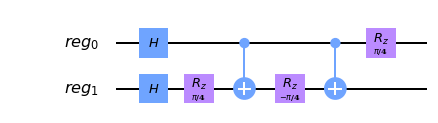

In [13]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

# draw the circuit
qc.draw(output='mpl')        # draw the circuit

### <font color="blue">Print out the Normalized StateVector.</font>

In [14]:
# Print out normalized statevector  (to gain probabilities)
#
normalize_state_Vector(outputstate)

Normalized Result:  0.2
Normalized Result:  0.2
Normalized Result:  0.2
Normalized Result:  0.2


### <font color="blue">Print out the Circle Plots.</font>
- These Circle Plots correspond exactly to the **"Enhanced"** version of the QCEngine code explored above.

![Custom C-Phase](img/Constructed_CPhase-90dg.png "")

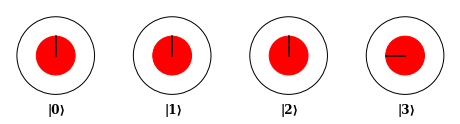

In [15]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(outputstate)

# <font color="red">Graded Exercises</font>  for use <font color="blue">with structured courses.</font>
## Constructing any Conditional Operation

> The recipe for constructing any Conditional Operation is to break the single-qubit operation into smaller steps. 
- It turns out that it’s always possible to break a single-qubit operation into a set of steps such that we can use CNOTs to conditionally undo the operation. 
- The net result is that we can conditionally choose whether or not to effect its action.

## <font color="Blue">Your Task:</font>

![Custom C-Phase](img/custom_cphase.png "")

#### You were given the code bases to implement the Constructed CPhase (90dg) gate using components of the framework.

Perform that same process for the following using the QCEngine Framework.

0. > #### 315 Degrees 
0. > #### 270 Degrees


The following convenience link is the conversions between degrees and radians: https://www.quia.com/jg/321176list.html

<BR>


   

In [66]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=3-5', width=900, height=900)

##  <font color="blue">Your Code goes below:</font> 315 degrees
- Use **RawNBConvert** instead of MarkDown for the QCEngine Code.


##  <font color="blue">Your Code goes below:</font> 270 degrees
- Use **RawNBConvert** instead of MarkDown for the QCEngine Code.

![the-end](img/the-end.png "the-end")